In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,make_scorer,r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
import random
np.random.seed(42)
random.seed(42)

In [3]:
df_diamonds = pd.read_csv("diamonds.csv")

In [4]:
df_diamond = df_diamonds.drop(columns = "Unnamed: 0")

In [5]:
train_set, test_set = train_test_split(df_diamond, test_size = 0.2)

In [6]:
train_features = train_set.drop(columns = "price")
train_labels = pd.DataFrame(train_set["price"])

test_features = test_set.drop(columns = "price")
test_labels = pd.DataFrame(test_set["price"])


In [7]:
#Pipeline only cat
num_attributes = ["carat","depth","table","x","y","z"]
cat_cut_level = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']] 
cat_color_level = [['J', 'I', 'H', 'G', 'F', 'E', 'D']]
cat_clarity_level = [['I1', 'SI2', 'SI1', 'VS2','VS1', 'VVS2','VVS1', 'IF']]
cat_attributes= ["cut","color","clarity"]

full_pipeline_cat = ColumnTransformer(
    transformers = [
    ("cat_cut",     OrdinalEncoder(categories=cat_cut_level),["cut"]),
    ("cat_color",   OrdinalEncoder(categories=cat_color_level),["color"]),
    ("cat_clarity", OrdinalEncoder(categories=cat_clarity_level),["clarity"])
    ],
    remainder = "passthrough"
)
    
train_features_cat = full_pipeline_cat.fit_transform(train_features)
test_features_cat = full_pipeline_cat.transform(test_features)

if(full_pipeline_cat.sparse_output_):
    train_features_cat = train_features_cat.toarray()
    test_features_cat = test_features_cat.toarray()
    
#Make them dataframe
df_train_features_cat = pd.DataFrame(train_features_cat, columns =  cat_attributes + num_attributes )
df_test_features_cat = pd.DataFrame(test_features_cat, columns = cat_attributes + num_attributes )

In [8]:
df_train_features_cat

,cut,color,clarity,carat,depth,table,x,y,z
0,1.0,4.0,1.0,2.01,58.1,64.0,8.23,8.19,4.77
1,2.0,5.0,1.0,1.01,60.0,60.0,6.57,6.49,3.92
2,3.0,2.0,3.0,1.10,62.5,58.0,6.59,6.54,4.10
3,1.0,5.0,1.0,1.50,61.5,65.0,7.21,7.17,4.42
4,2.0,3.0,4.0,1.52,62.1,57.0,7.27,7.32,4.53
...,...,...,...,...,...,...,...,...,...
43147,2.0,1.0,3.0,1.05,62.4,59.0,6.48,6.51,4.05
43148,4.0,6.0,4.0,0.47,61.0,55.0,5.03,5.01,3.06
43149,2.0,4.0,7.0,0.33,60.3,58.0,4.49,4.46,2.70
43150,3.0,0.0,2.0,0.90,62.8,59.0,6.13,6.03,3.82


In [9]:
#Pipeline with standardscaler
num_attributes = ["carat","depth","table","x","y","z"]
all_atributes =  cat_attributes + num_attributes

num_pipeline_scaler = Pipeline([
    ('std_scaler',StandardScaler()),
])


full_pipeline_scaler = ColumnTransformer(
    transformers = [
    ("num", num_pipeline_scaler, all_atributes),
    ],
    remainder = "passthrough"
)
    

train_features_ss = full_pipeline_scaler.fit_transform(df_train_features_cat)
test_features_ss = full_pipeline_scaler.transform(df_test_features_cat)

if(full_pipeline_scaler.sparse_output_):
    train_features_ss = train_features_ss.toarray()
    test_features_ss = test_features_ss.toarray()
    
#Make them dataframe
df_train_features_ss = pd.DataFrame(train_features_ss, columns = all_atributes)
df_test_features_ss  = pd.DataFrame(test_features_ss, columns = all_atributes)

In [10]:
df_train_features_ss

,cut,color,clarity,carat,depth,table,x,y,z
0,-1.708965,0.347949,-1.246901,2.560056,-2.550748,2.933861,2.229450,2.138209,1.738207
1,-0.812192,0.936621,-1.246901,0.447392,-1.220426,1.139575,0.747550,0.656710,0.537733
2,0.084582,-0.829396,-0.032134,0.637532,0.529996,0.242432,0.765404,0.700284,0.791951
3,-1.708965,0.936621,-1.246901,1.482597,-0.170173,3.382432,1.318885,1.249310,1.243894
4,-0.812192,-0.240724,0.575249,1.524851,0.249928,-0.206140,1.372448,1.380030,1.399249
...,...,...,...,...,...,...,...,...,...
43147,-0.812192,-1.418069,-0.032134,0.531899,0.459979,0.691003,0.667206,0.674140,0.721335
43148,0.981355,1.525294,0.575249,-0.693447,-0.520257,-1.103283,-0.627225,-0.633065,-0.676864
43149,-0.812192,0.347949,2.397399,-0.989219,-1.010376,0.242432,-1.109289,-1.112374,-1.185299
43150,0.084582,-2.006742,-0.639517,0.214999,0.740047,0.691003,0.354757,0.255834,0.396501


In [11]:
label_process_ss = StandardScaler()
train_labels_ss = label_process_ss.fit_transform(train_labels)
test_labels_ss = label_process_ss.transform(test_labels)
   
#Make them dataframe
df_train_labels_ss = pd.DataFrame(train_labels_ss, columns = ["price"])
df_test_labels_ss  = pd.DataFrame(test_labels_ss, columns = ["price"])

In [12]:
#Neural Network part

In [13]:
from sklearn.neural_network import MLPRegressor

In [14]:
"""
MLPRegressor(hidden_layer_sizes=(100,), activation='relu',  
             solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', 
             learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
             random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
             nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
             beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
"""

"\nMLPRegressor(hidden_layer_sizes=(100,), activation='relu',  \n             solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', \n             learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, \n             random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, \n             nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, \n             beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)\n"

In [15]:
default_pipeline = Pipeline([
    ('model',MLPRegressor())
    ])
    

params = [
     {
          "model":[MLPRegressor()],
          "model__alpha":[1e-6,1e-3,1e1],
          "model__hidden_layer_sizes":[(10,),(10,10,),(100,),(100,100,),(200,),(200,200,)],
          #"model__learning_rate":['adaptive'],
          "model__activation":['identity','relu']
     }
]

In [16]:
#KFold(n_splits=5, shuffle=False, random_state=42)
array_train = np.array(df_train_features_ss)
array_label = np.array(df_train_labels_ss).ravel()

g_s = GridSearchCV(default_pipeline, params,cv=KFold(n_splits=10,shuffle = True, random_state = 42),n_jobs=-1, scoring=('neg_root_mean_squared_error'),verbose=10,
                    return_train_score=False)
g_s.fit(array_train,array_label)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('model', MLPRegressor())]), n_jobs=-1,
             param_grid=[{'model': [MLPRegressor(alpha=1e-06,
                                                 hidden_layer_sizes=(100,
                                                                     100))],
                          'model__activation': ['identity', 'relu'],
                          'model__alpha': [1e-06, 0.001, 10.0],
                          'model__hidden_layer_sizes': [(10,), (10, 10), (100,),
                                                        (100, 100), (200,),
                                                        (200, 200)]}],
             scoring='neg_root_mean_squared_error', verbose=10)

In [17]:
import joblib
joblib.dump(g_s, 'nn_grid_search.pkl')

['nn_grid_search.pkl']

In [18]:
import joblib
grid_search = joblib.load('nn_grid_search.pkl')

In [19]:
df_g = pd.DataFrame(grid_search.cv_results_)
sorted_g = df_g.sort_values(by='rank_test_score', ascending=True)

In [20]:
sorted_g[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__activation,param_model__alpha,param_model__hidden_layer_sizes,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
21,45.222993,7.887820,0.027459,0.001679,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",relu,0.000001,"(100, 100)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.146602,...,-0.146476,-0.138329,-0.138206,-0.136564,-0.135141,-0.144128,-0.134930,-0.140744,0.004454,1
23,162.155495,45.333820,0.091395,0.009584,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",relu,0.000001,"(200, 200)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.141133,...,-0.183052,-0.138066,-0.137010,-0.132169,-0.137653,-0.142436,-0.135798,-0.141739,0.014074,2
29,153.309147,36.374703,0.093159,0.019402,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",relu,0.001,"(200, 200)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.146163,...,-0.169017,-0.138796,-0.139307,-0.133798,-0.137246,-0.140154,-0.133103,-0.141795,0.009857,3
27,51.727427,16.256343,0.034580,0.005234,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",relu,0.001,"(100, 100)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.149685,...,-0.170605,-0.138158,-0.140546,-0.150330,-0.131856,-0.159765,-0.133393,-0.145606,0.011817,4
28,30.418325,7.079172,0.022829,0.004340,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",relu,0.001,"(200,)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.151104,...,-0.213336,-0.145471,-0.140429,-0.138937,-0.144531,-0.177243,-0.141068,-0.153352,0.022717,5
26,15.638937,3.008733,0.009222,0.001271,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",relu,0.001,"(100,)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.151190,...,-0.278928,-0.147009,-0.153997,-0.142780,-0.134544,-0.151119,-0.141400,-0.158619,0.040554,6
20,16.998183,3.134386,0.009520,0.001041,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",relu,0.000001,"(100,)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.151082,...,-0.304496,-0.140992,-0.144878,-0.141101,-0.142535,-0.164883,-0.133844,-0.160712,0.048596,7
22,27.723284,5.212073,0.018010,0.002067,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",relu,0.000001,"(200,)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.147129,...,-0.379456,-0.142312,-0.140776,-0.140350,-0.137916,-0.149500,-0.142656,-0.166074,0.071215,8
25,8.665704,1.432356,0.002275,0.000358,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",relu,0.001,"(10, 10)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.160103,...,-0.337950,-0.148214,-0.148535,-0.145208,-0.144697,-0.154988,-0.147127,-0.167911,0.056872,9
19,9.453995,2.344614,0.002275,0.000481,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",relu,0.000001,"(10, 10)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.153379,...,-0.366214,-0.149524,-0.158647,-0.144864,-0.156982,-0.168550,-0.154304,-0.174527,0.064265,10


In [21]:
preds = g_s.predict(np.array(df_test_features_ss))
r2 = r2_score(np.array(df_test_labels_ss).ravel(), preds)
rmse = mean_squared_error(np.array(df_test_labels_ss).ravel(), preds, squared=False)
print("Test R2: " ,r2)
print("Test RMSE: " ,rmse)

Test R2:  0.9798190706850282
Test RMSE:  0.141957205127966


In [22]:
#RELU Show off
#Identity performs similar to linear regression
sorted_g.loc[sorted_g['param_model__activation'] == 'identity']

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__activation,param_model__alpha,param_model__hidden_layer_sizes,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
6,2.052393,0.665195,0.001049,0.000159,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",identity,0.001,"(10,)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.294358,...,-0.287695,-0.306710,-0.344191,-0.308652,-0.298077,-0.307024,-0.307009,-0.305863,0.014263,19
1,2.064571,0.347738,0.001776,0.000455,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",identity,0.000001,"(10, 10)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.296134,...,-0.288577,-0.308891,-0.342123,-0.306001,-0.298139,-0.305886,-0.307701,-0.306245,0.013496,20
0,1.785478,0.439056,0.000901,0.000300,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",identity,0.000001,"(10,)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.294926,...,-0.290164,-0.308318,-0.340267,-0.307712,-0.296673,-0.307949,-0.308688,-0.306278,0.012906,21
7,2.106434,0.545078,0.001681,0.000387,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",identity,0.001,"(10, 10)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.294766,...,-0.288767,-0.309846,-0.341276,-0.307328,-0.298267,-0.306122,-0.307338,-0.306279,0.013279,22
3,17.562126,6.536057,0.023864,0.004595,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",identity,0.000001,"(100, 100)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.295773,...,-0.297264,-0.310687,-0.338595,-0.307001,-0.297685,-0.305967,-0.309969,-0.307125,0.011619,23
8,2.486355,0.864034,0.005306,0.000847,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",identity,0.001,"(100,)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.295490,...,-0.294193,-0.308346,-0.339792,-0.307934,-0.301484,-0.305996,-0.311729,-0.307265,0.012133,24
10,5.805835,2.858200,0.010573,0.002023,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",identity,0.001,"(200,)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.298185,...,-0.289384,-0.307657,-0.347127,-0.307920,-0.301653,-0.306471,-0.308199,-0.307661,0.014262,25
2,1.995470,0.244919,0.006043,0.002383,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",identity,0.000001,"(100,)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.295962,...,-0.288251,-0.310154,-0.354826,-0.307723,-0.299113,-0.308274,-0.309332,-0.308076,0.016936,26
11,56.095807,28.935212,0.077110,0.007956,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",identity,0.001,"(200, 200)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.305495,...,-0.290545,-0.308180,-0.341484,-0.305981,-0.300365,-0.308790,-0.308807,-0.308760,0.012229,27
4,3.290193,0.734663,0.009761,0.001665,"MLPRegressor(alpha=1e-06, hidden_layer_sizes=(...",identity,0.000001,"(200,)","{'model': MLPRegressor(alpha=1e-06, hidden_lay...",-0.294398,...,-0.290254,-0.311339,-0.352489,-0.305651,-0.304864,-0.305884,-0.312739,-0.309167,0.016079,28


In [23]:
rms_list = []
r2_list = []

clf_id = MLPRegressor(alpha =0.001  ,hidden_layer_sizes=(10), activation = 'identity')

model_fit = clf_id.fit(array_train,array_label)
preds = model_fit.predict(np.array(df_test_features_ss))
r2 = r2_score(np.array(df_test_labels_ss).ravel(), preds)
rmse = mean_squared_error(np.array(df_test_labels_ss).ravel(), preds, squared=False)
rms_list.append(rmse)
r2_list.append(r2)

clf_relu = MLPRegressor(alpha =0.000001 ,hidden_layer_sizes=(100, 100), activation = 'relu')
model_fit = clf_relu.fit(array_train,array_label)
preds = model_fit.predict(np.array(df_test_features_ss))
r2 = r2_score(np.array(df_test_labels_ss).ravel(), preds)
rmse = mean_squared_error(np.array(df_test_labels_ss).ravel(), preds, squared=False)
rms_list.append(rmse)
r2_list.append(r2)


print(rms_list)
print(r2_list)

[0.30821918314476354, 0.14004087951847932]
[0.9048638415420397, 0.9803602506904753]


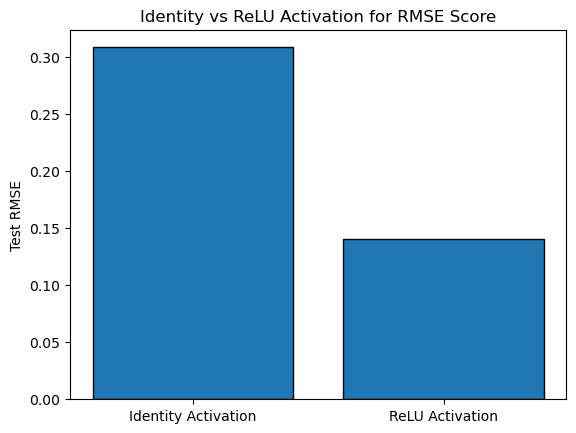

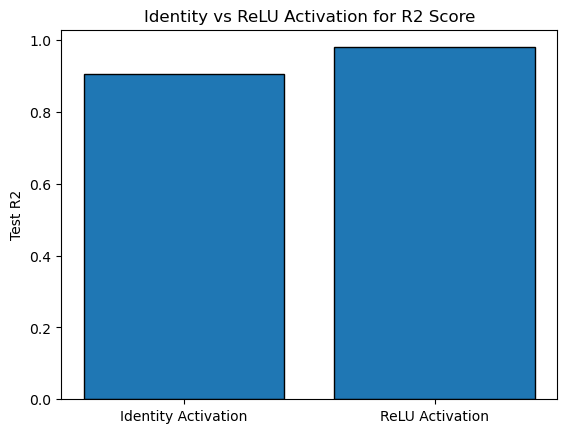

In [24]:
plt.bar(np.arange(1,3),rms_list ,edgecolor = "Black")
plt.xticks(np.arange(1,3))
plt.title("Identity vs ReLU Activation for RMSE Score")
plt.ylabel("Test RMSE")
plt.xticks([1,2], ["Identity Activation", "ReLU Activation"])
plt.show()
      
plt.bar(np.arange(1,3),r2_list, edgecolor = "Black")
plt.xticks(np.arange(1,3))
plt.title("Identity vs ReLU Activation for R2 Score")
plt.ylabel("Test R2")
plt.xticks([1,2], ["Identity Activation", "ReLU Activation"])
plt.show()